## Procesamiento de imagenes

In [ ]:
# !pip install opencv-python

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 

### Primero intentaremos fijarnos en los colores de la imagen

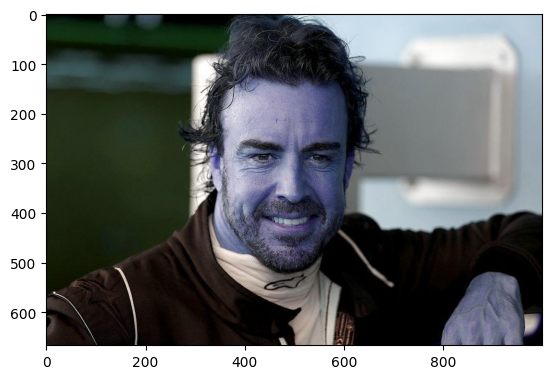

In [2]:
imagen = cv2.imread('../img/faces/6.jpg')
plt.imshow(imagen);

In [3]:
# Copiamos la imagen para trabajar sobre ella copiada
imagen_copy = np.copy(imagen)

Tenemos 667  pixeles en el eje de las X
Tenemos 1000  pixeles en el eje de las Y


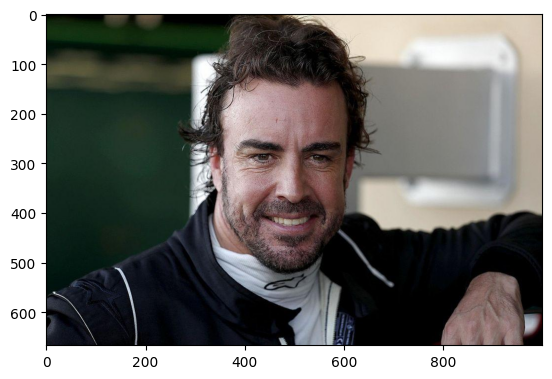

In [4]:
# Convertimos el color a RGB ya que matplotlib, es como mejor la reconoce.
imagen_copy = cv2.cvtColor(imagen_copy, cv2.COLOR_BGR2RGB)
print('Tenemos',imagen_copy.shape[0], ' pixeles en el eje de las X')
print('Tenemos',imagen_copy.shape[1], ' pixeles en el eje de las Y')

# Mostramos la imagen 
x = plt.imshow(imagen_copy)

## Seleccion de pixeles

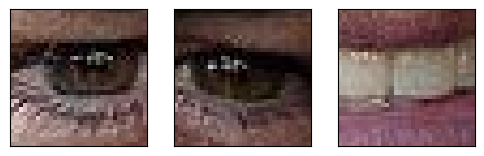

In [5]:
pixeles = [ [290,435], [290,550], [420,500]]

examples = []

for pixel in pixeles:

    #Imagen[desde:hasta, desde:hasta]

    example = imagen_copy[pixel[0]-16:pixel[0]+16,pixel[1]-16:pixel[1]+16]
    examples.append(example)

fig = plt.figure(0,(6,4))

for i, example in enumerate (examples):
    #Dos filas y tres columnas 
    ax = fig.add_subplot(2,3,i+1)
    # Mostra imagen con matplotlib
    ax.imshow(example,cmap='gray', interpolation = 'none', vmin =0, vmax=200)
    ax.set_xticks([])
    ax.set_yticks([])

## Importamos la foto

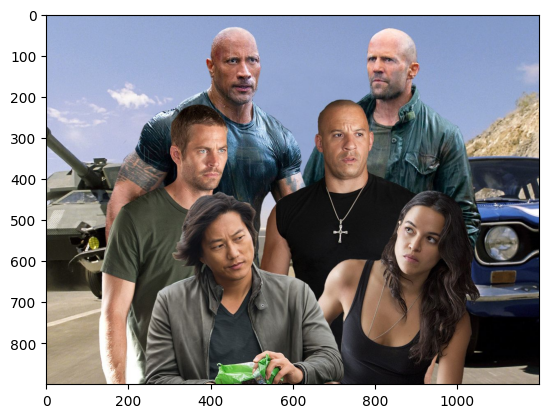

In [6]:
#Cargamos una foto y la convertimos en RGB

img = cv2.imread('../img/faces/23.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);


In [7]:
img.shape

(900, 1200, 3)

## Cambiamos la posición de la foto 

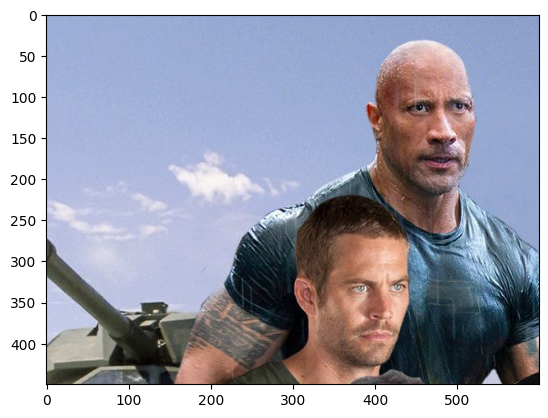

In [8]:
cropped_1 = img[:img.shape[0]//2,:img.shape[1]//2]
plt.imshow(cropped_1);


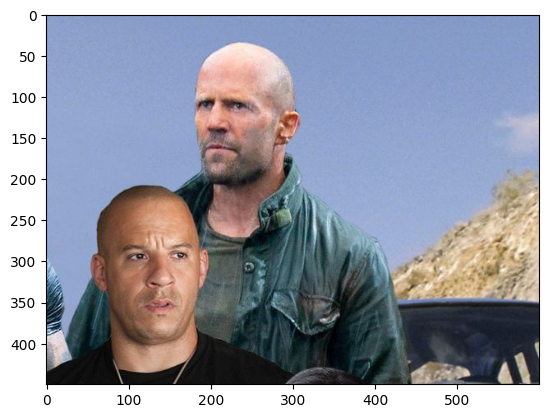

In [9]:
cropped_2 = img[:img.shape[0]//2,img.shape[1]//2:]
plt.imshow(cropped_2);

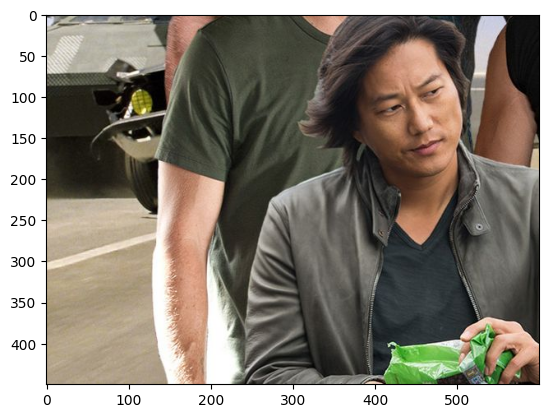

In [10]:
cropped_3 = img[img.shape[0]//2:,:img.shape[1]//2]
plt.imshow(cropped_3);

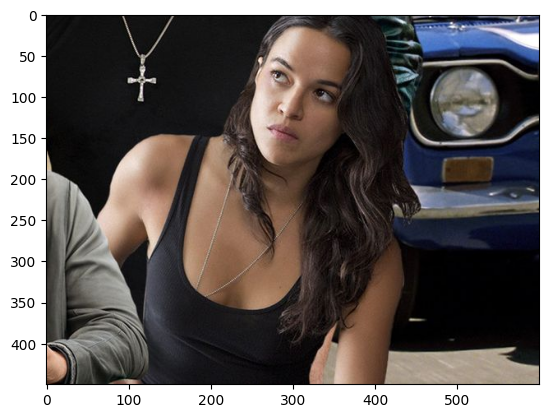

In [11]:
cropped_4 = img[img.shape[0]//2:,img.shape[1]//2:]
plt.imshow(cropped_4);

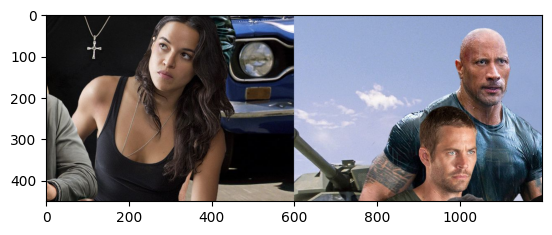

In [12]:
row_1 = cv2.hconcat([cropped_4,cropped_1])
plt.imshow(row_1);


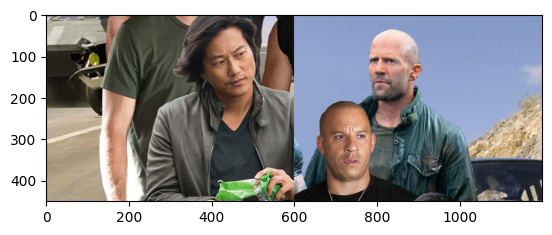

In [13]:
row_2 = cv2.hconcat([cropped_3, cropped_2])
plt.imshow(row_2);

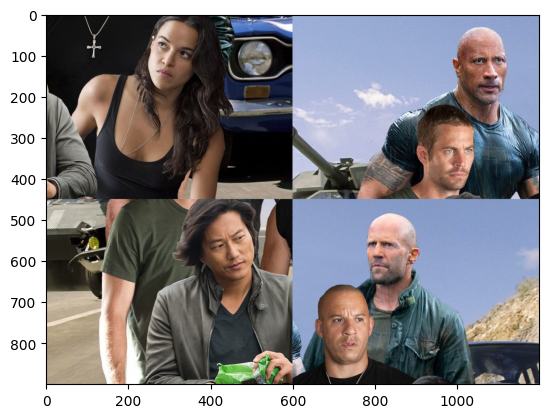

In [14]:
new_img = cv2.vconcat([row_1, row_2])
plt.imshow(new_img);

### Cual es el esqueleto de las convoluciones? -->

In [17]:
kernel = np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
kernel

img =cv2.resize(img, (400, 300))
feature_map = np.zeros((img.shape[0]-2, img.shape[1]-2))

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        suma = 0
        for canal in range(3):
            
            suma += sum(sum(img[i-1:i+2, j-1:j+2, canal] * kernel))
        
        feature_map[i-1, j-1] = suma
        

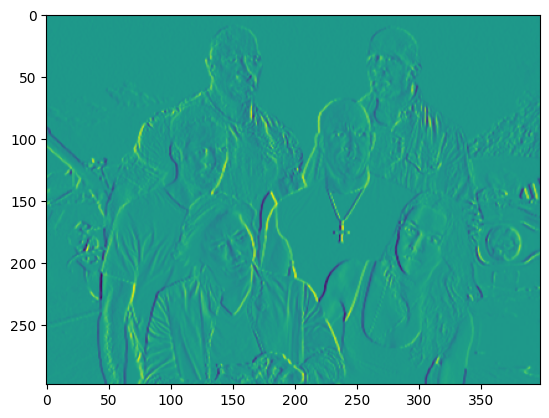

In [19]:
plt.imshow(feature_map) 

## Recorte foto 

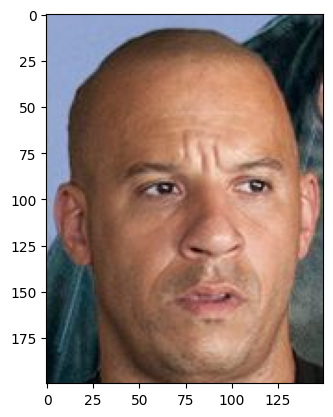

In [15]:
# Seleccionamos un recorte de nuestra foto
# Imagen[desdeY:hastaY, desdeX:hastX]

cara_vin = img[200:400, 650:800]
plt.imshow(cara_vin, cmap='gray')


## Borrosa

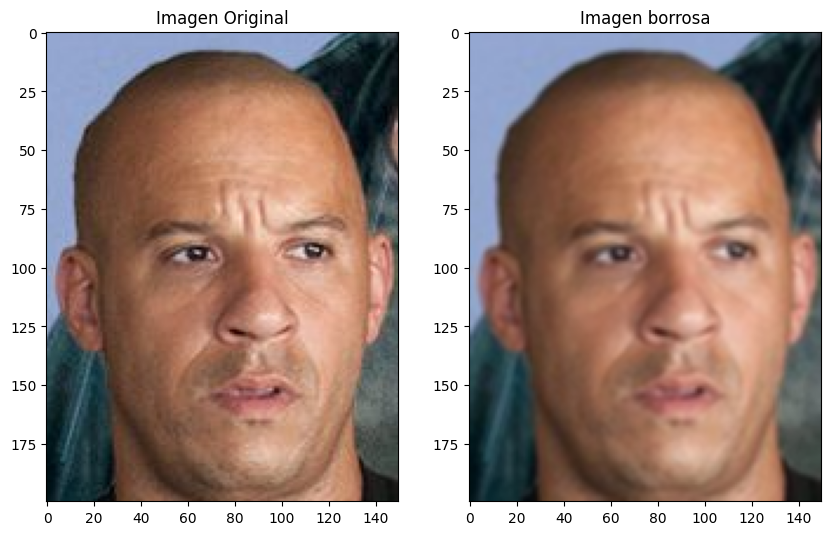

In [16]:
# Hacemos borrosa la imagen y las visualizamos
img_filtered = cv2.blur(cara_vin, (3, 3))

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(cara_vin, cmap='gray')

plt.subplot(122)
img_filtered = cv2.blur(cara_vin, (3, 3))
plt.title('Imagen borrosa')
plt.imshow(img_filtered);

## Ruido

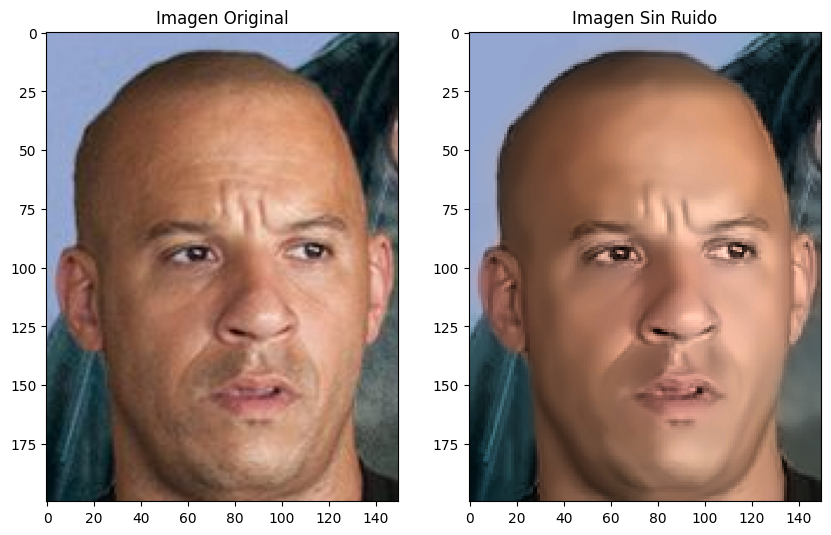

In [17]:
# Destacar o resaltar lineas horizontales

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(cara_vin, cmap='gray')

plt.subplot(122)
#Desnoised=cv.cvtColor(zona, cv.COLOR_BGR2RGB)
Desnoised = cv2.fastNlMeansDenoisingColored(cara_vin, None, 5, 10, 7, 21)
plt.title('Imagen Sin Ruido')
plt.imshow(Desnoised, cmap = 'gray', interpolation='none');


In [18]:
cara_vin.shape

(200, 150, 3)

## Rotar

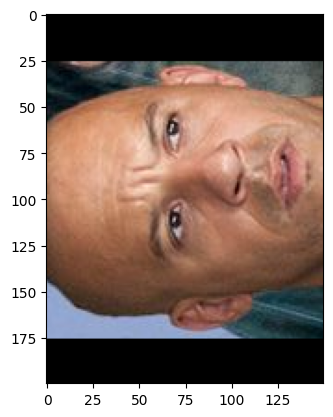

In [19]:
widht = 150
height = 200
centro = (widht/2, height/2)

# cv.getRotationMatrix2D(CENTER, ANGLE, SCALE)
Matrix = cv2.getRotationMatrix2D(centro, 90, 1.0)

Rotar = cv2.warpAffine(cara_vin, Matrix,(widht, height))
plt.imshow(Rotar);

## Rectangulos y letras

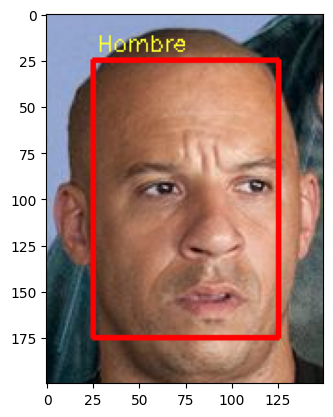

In [20]:
# Colocar el texto 

# cv.putText(imagen, "Texto" punto de inicio(x,y), cv.Font_Italic, escala, color,2)
detectar = np.copy(cara_vin)
cv2.putText(detectar,'Hombre', (27,20), cv2.FONT_ITALIC,0.4,(255,255,50),1)
# cv.rectangle(imagen, (x,y), (x,y), color(255,0,0), grosor)
cv2.rectangle(detectar,(25,25),(125,175),(255,0,0),2)

# Mostramos
plt.imshow(detectar);

# Añadir formas

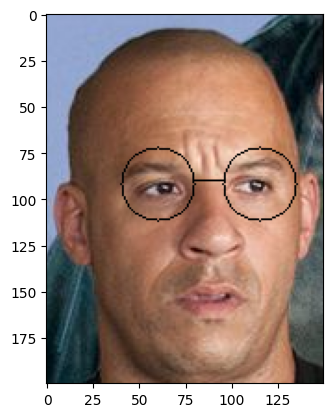

In [21]:
# Vamos a dibujar unas gafas a Vin diesel
gafa = np.copy(cara_vin)
#cv.Circle(imagen, center(x,y), radio, color, grosor)

cv2.circle(gafa, (60,92), 20, (0,0,0),1)
cv2.circle(gafa, (115,92), 20, (0,0,0),1)

#cv.line(imagen, desde(x,y), hasta(x,y), color, grosor)

cv2.line(gafa, (79,90), (96,90),(0,0,0),1)

plt.imshow(gafa);

¿Queremos pintar un bigote al bueno de Vin?

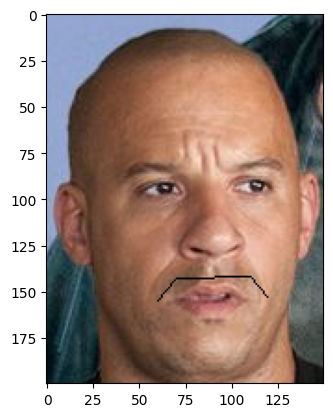

In [22]:
moustache_vin = np.copy(cara_vin)

bigote_puntos = np.array([[60, 155], [70, 143], [110, 142], [119, 153]], np.int32)

bigote_puntos = bigote_puntos.reshape((-1, 1, 2))
cv2.polylines(moustache_vin, [bigote_puntos], isClosed=False, color=(0, 0, 0), thickness=1)
# imagen_rgb = cv2.cvtColor(moustache_vin, cv2.COLOR_BGR2RGB)
# cv2.imshow("Moustache Vin", imagen_rgb)
# cv2.waitKey(0)
plt.imshow(moustache_vin);


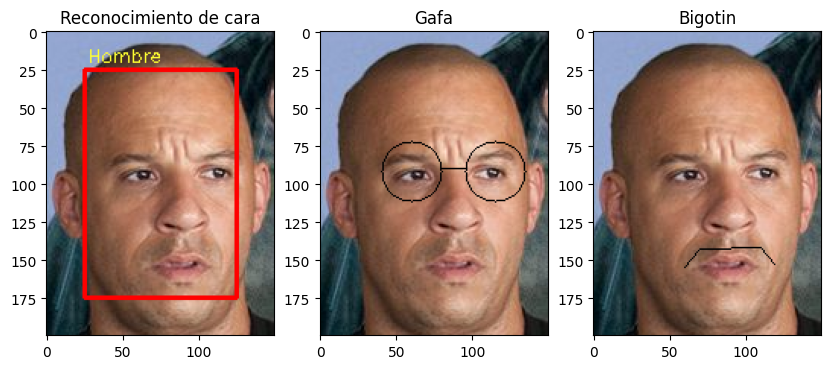

In [23]:
fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.title('Reconocimiento de cara')
plt.imshow(detectar)

plt.subplot(132)
plt.title('Gafa')
plt.imshow(gafa);

plt.subplot(133)
plt.title('Bigotin')
plt.imshow(moustache_vin);

plt.show()


In [24]:
fig.savefig('../img/img_made_nb/fig.png')

## ATENCIÓN!!! NO EJECUTAR EL CÓDIGO DE ABAJO!!!

In [25]:
# Si ejecutais este código en un .ipynb se va a romper el kernel

import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

img = cv2.imread("../img/faces/6.jpeg")

# Convertimos a escala de grises

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered = cv2.blur(img, (3, 3))

# Detectamos las caras
faces = face_cascade.detectMultiScale(img_filtered, 1.1, 4)

# Dibujamos rectangulo en cada cara
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(5)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Prueba a reconocer caras en videos y coche en video. (Carpeta src, car_video_detect.py, faces_video_detect.py y face_img_detect.py si es solo imagen)